In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from smh.specutils import Spectrum1D
from astropy.io import ascii
from astropy import table
import glob, os, sys, time, re

In [2]:
tab = ascii.read("tab02.tex", delimiter='&',guess=False,comment="%")
instruments = map(lambda x: x.split("/")[1], tab["Telescope/Instrument"])
tab.add_column(table.Column(instruments, name="Instrument"))

In [8]:
tab.show_in_notebook()

idx,Star,Telescope/Instrument,Observer,ExpTime,Date,UT,MJD,vhel,Instrument
0,CS22166-016,Magellan-Clay/MIKE,GWP,1600,2004 Aug 12,10:19,2453229.934,-210.0,MIKE
1,CS22169-035,Magellan-Baade/MIKE,GWP,1400,2003 Jan 18,04:22,2452657.684,+15.4,MIKE
2,CS22169-035,Magellan-Baade/MIKE,GWP,2400,2003 Jan 20,02:05,2452659.589,+14.1,MIKE
3,CS22169-035,Magellan-Clay/MIKE,GWP,1700,2007 Aug 24,09:56,2454336.914,+14.1,MIKE
4,CS22172-029,Magellan-Clay/MIKE,GWP,4000,2008 Sep 10,09:20,2454719.892,-57.4,MIKE
5,CS22172-029,Magellan-Clay/MIKE,GWP,3600,2008 Sep 11,08:06,2454720.84,-57.5,MIKE
6,CS22183-031,Magellan-Clay/MIKE,GWP,1400,2006 Aug 03,10:23,2453950.935,+23.1,MIKE
7,CS22185-007,Magellan-Clay/MIKE,IUR,2000,2012 Aug 27,08:03,2456166.837,+102.0,MIKE
8,CS22186-023,Magellan-Baade/MIKE,GWP,2000,2003 Jan 20,03:29,2452659.646,+52.0,MIKE
9,CS22186-023,Magellan-Clay/MIKE,GWP,2400,2005 Aug 20,09:42,2453602.905,+52.0,MIKE


GWP = George Preston

IBT = Ian Thompson

IUR = Ian Roederer

SAS = Steve Shectman

In [23]:
for observer in np.unique(tab["Observer"]):
    print observer, np.sum(tab["Observer"]==observer), np.sum(tab[tab["Observer"]==observer]["ExpTime"])/3600.

GWP 65 53.3152777778
IBT 35 12.1961111111
IUR 21 16.3388888889
SAS 17 15.2222222222


In [25]:
dates_by_observer = [tab[ii]["MJD"] for ii in [tab["Observer"]==observer for observer in ["GWP","IBT","IUR","SAS"]]]

<IPython.core.display.Javascript object>


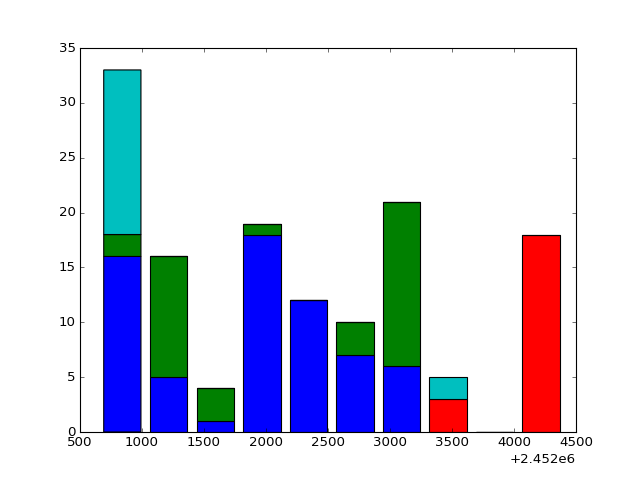

([array([ 16.,   5.,   1.,  18.,  12.,   7.,   6.,   0.,   0.,   0.]),
  array([ 18.,  16.,   4.,  19.,  12.,  10.,  21.,   0.,   0.,   0.]),
  array([ 18.,  16.,   4.,  19.,  12.,  10.,  21.,   3.,   0.,  18.]),
  array([ 33.,  16.,   4.,  19.,  12.,  10.,  21.,   5.,   0.,  18.])],
 array([ 2452653.79  ,  2453028.9998,  2453404.2096,  2453779.4194,
         2454154.6292,  2454529.839 ,  2454905.0488,  2455280.2586,
         2455655.4684,  2456030.6782,  2456405.888 ]),
 <a list of 4 Lists of Patches objects>)

In [26]:
plt.hist(dates_by_observer, stacked=True)

Nice this is all done over 11 years...

Manual name check to ensure everything is there. I had to manually change two stars that had typos.

In [19]:
fnames = map(os.path.basename, glob.glob("data/*.fits"))
def goodname(name):
    if name.startswith("bdm"):
        name = "_".join(name.split("-"))
        name = "bd-"+name[3:]
    if name.startswith("bdp"):
        name = "_".join(name.split("-"))
        name = "bd+"+name[3:]
    if name.startswith("cdm"):
        name = "_".join(name.split("-"))
        name = "cd-"+name[3:]
    if name.startswith("cdp"):
        name = "_".join(name.split("-"))
        name = "cd+"+name[3:]
    if "blue" in name:
        return name.split("blue")[0].upper()
    if "red" in name:
        return name.split("red")[0].upper()
goodnames = map(goodname, fnames)
for name in goodnames:
    if name not in tab["Star"]: print name
print
for name in tab["Star"]:
    if name not in goodnames: print name